# 1. Segmentasyon Problemi

In [1]:
!pip install yellowbrick

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer

In [13]:
arrests = pd.read_csv("USArrests.csv")

df = arrests.copy()

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [14]:
df.index

RangeIndex(start=0, stop=50, step=1)

In [15]:
df.index = df.iloc[:, 0]

df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,,
Alabama,Alabama,13.2,236,58,21.2
Alaska,Alaska,10.0,263,48,44.5
Arizona,Arizona,8.1,294,80,31.0
Arkansas,Arkansas,8.8,190,50,19.5
California,California,9.0,276,91,40.6


In [16]:
df = df.iloc[:, 1:5]

df.head()

,Murder,Assault,UrbanPop,Rape
Unnamed: 0,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [17]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [18]:
df.info

<bound method DataFrame.info of                 Murder  Assault  UrbanPop  Rape
Unnamed: 0                                     
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine   

In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


In [22]:
df.index.name = "States"

df.head()

,Murder,Assault,UrbanPop,Rape
States,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


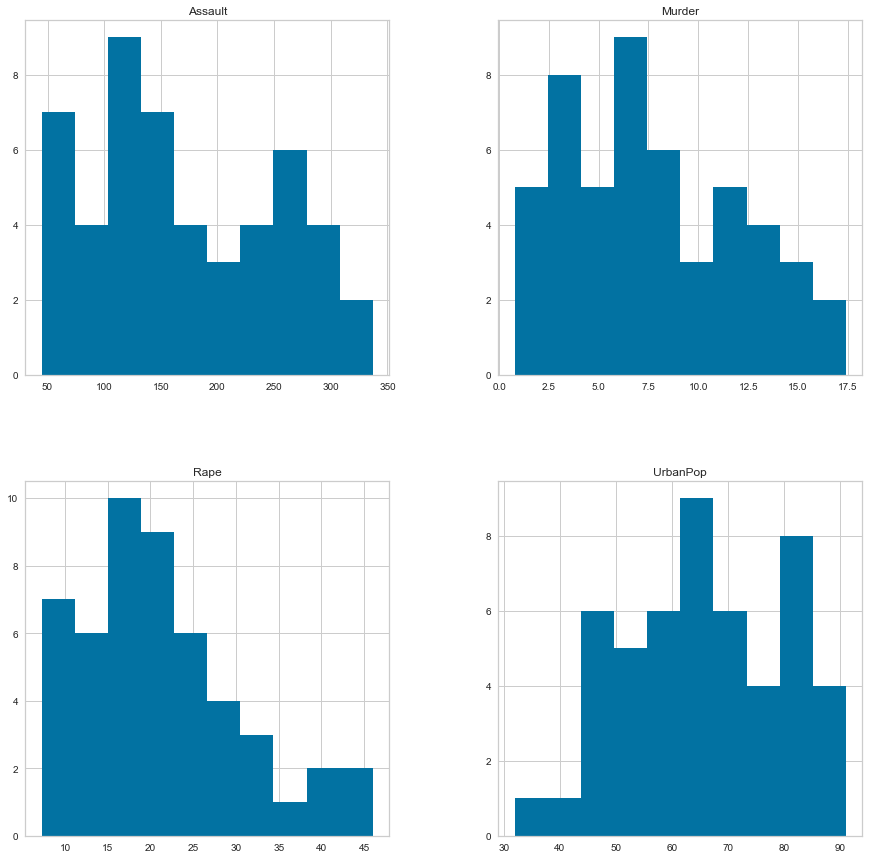

In [25]:
df.hist(figsize = (15, 15));

In [26]:
kmeans = KMeans(n_clusters = 4)

kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
?kmeans

Type:        KMeans
String form:
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
File:        c:\users\sefa3\anaconda3\lib\site-packages\sklearn\cluster\k_means_.py
Docstring:  
K-Means clustering

Read more in the :ref:`User Guide <k_means>`.

Parameters
----------

n_clusters : int, optional, default: 8
    The number of clusters to form as well as the number of
    centroids to generate.

init : {'k-means++', 'random' or an ndarray}
    Method for initialization, defaults to 'k-means++':

    'k-means++' : selects initial cluster centers for k-mean
    clustering in a smart way to speed up convergence. See section
    Notes in k_init for more details.

    'random': choose k observations (rows) at random from data for
    the initial centroids.

    If an ndarray is passed, it should be of shape (n_clusters, n_features)
    and gives the in

In [28]:
k_fit = kmeans.fit(df)

k_fit

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
k_fit.n_clusters

4

In [30]:
k_fit.cluster_centers_

array([[ 11.8125    , 272.5625    ,  68.3125    ,  28.375     ],
       [  5.59      , 112.4       ,  65.6       ,  17.27      ],
       [  8.21428571, 173.28571429,  70.64285714,  22.84285714],
       [  2.95      ,  62.7       ,  53.9       ,  11.51      ]])

In [31]:
# hangi eyalete hangi class'ları aldık ?
# her bir gözlemin hangi sınıf etiketine, gözlem etiketine sahip olduğunu öğrenmek için;
k_fit.labels_

array([0, 0, 0, 2, 0, 2, 1, 0, 0, 2, 3, 1, 0, 1, 3, 1, 1, 0, 3, 0, 2, 0,
       3, 0, 2, 1, 1, 0, 3, 2, 0, 0, 0, 3, 1, 2, 2, 1, 2, 0, 3, 2, 2, 1,
       3, 2, 2, 3, 3, 2])

In [33]:
# görselleşirme yapmak için;

kmeans = KMeans(n_clusters = 2)

k_fit = kmeans.fit(df)

In [34]:
kumelerim = k_fit.labels_

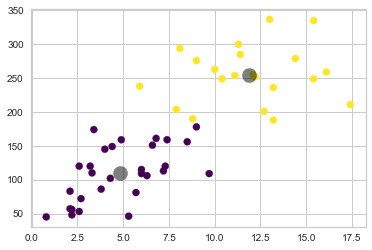

In [35]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = kumelerim, s = 50, cmap = "viridis")

merkezler = k_fit.cluster_centers_

plt.scatter(merkezler[:,0], merkezler[:,1], c = "black", s = 200, alpha = 0.5);

In [36]:
kmeans = KMeans(n_clusters = 3)

k_fit = kmeans.fit(df)

kumeler = k_fit.labels_

merkezler = kmeans.cluster_centers_

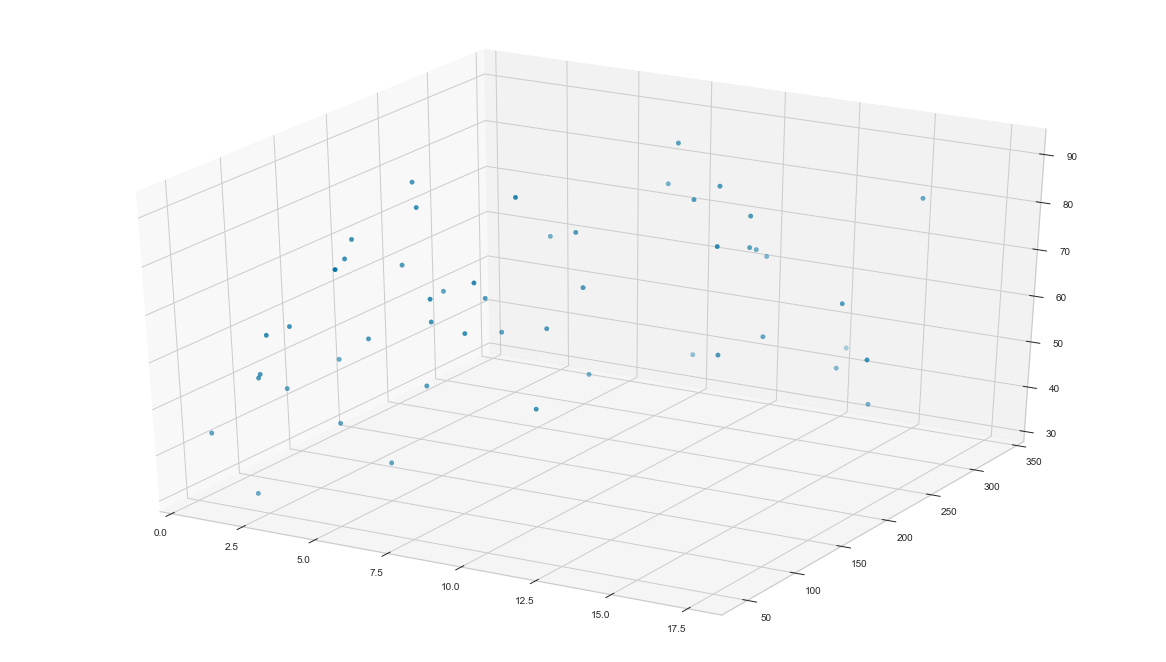

In [37]:
plt.rcParams['figure.figsize'] = (16, 9)

fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2]);

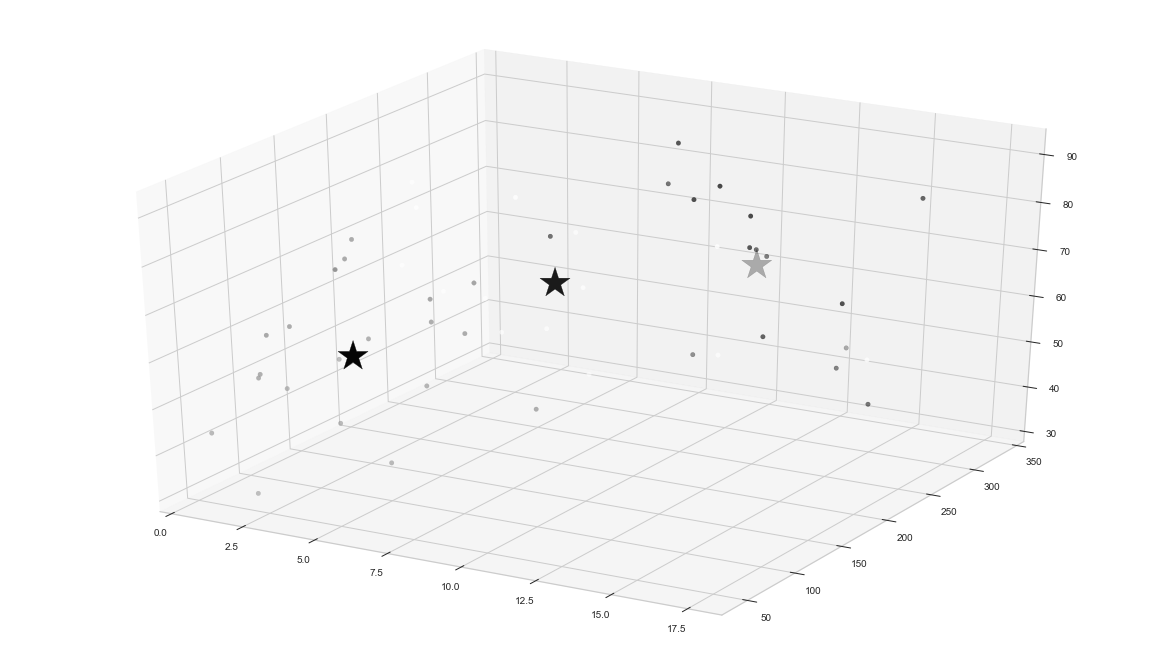

In [38]:
fig = plt.figure()

ax = Axes3D(fig)

ax.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 2], c=kumeler)

ax.scatter(merkezler[:, 0], merkezler[:, 1], merkezler[:, 2], 
           marker='*', 
           c='#050505', 
           s=1000);

In [39]:
# kümeler ve gözlem birimleri

kmeans = KMeans(n_clusters = 3)

k_fit = kmeans.fit(df)

kumeler = k_fit.labels_

In [40]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,0
1,Alaska,0
2,Arizona,0
3,Arkansas,2
4,California,0
5,Colorado,2
6,Connecticut,1
7,Delaware,0
8,Florida,0
9,Georgia,2


In [41]:
df["kume_numarasi"] = kumeler

df.head()

,Murder,Assault,UrbanPop,Rape,kume_numarasi
States,,,,,
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,0
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,0


------------

# 2. Elbow ile Optimum Küme Sayısının Belirlenmesi

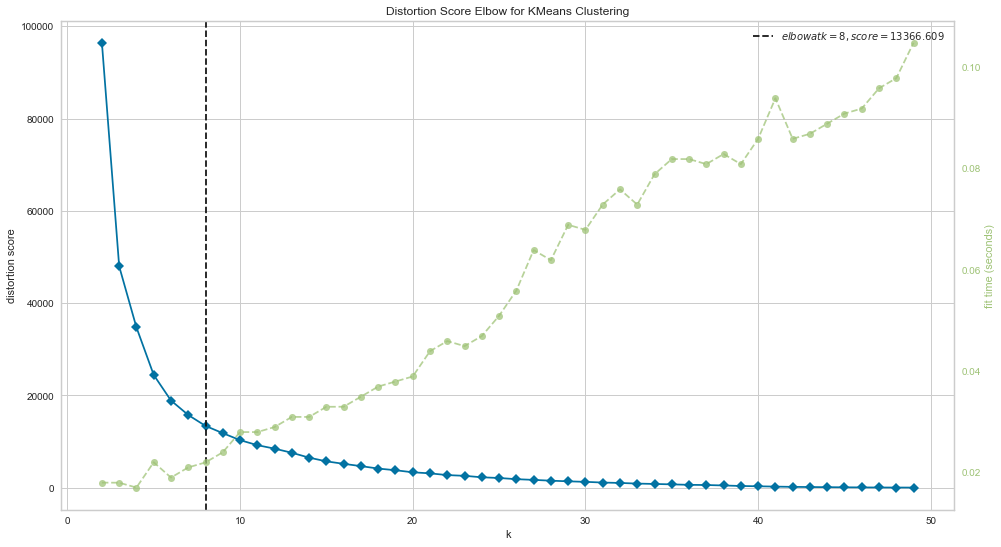

In [43]:
kmeans = KMeans()

visualizer = KElbowVisualizer(kmeans, k = (2, 50))

visualizer.fit(df)

visualizer.poof();

In [44]:
kmeans = KMeans(n_clusters = 8)

k_fit = kmeans.fit(df)

kumeler = k_fit.labels_

In [45]:
pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,5
2,Arizona,5
3,Arkansas,6
4,California,5
5,Colorado,6
6,Connecticut,1
7,Delaware,2
8,Florida,0
9,Georgia,6


In [47]:
kmeans = KMeans(n_clusters = 7)

k_fit = kmeans.fit(df)

kumeler = k_fit.labels_

pd.DataFrame({"Eyaletler" : df.index, "Kumeler": kumeler})[0:10]

,Eyaletler,Kumeler
0,Alabama,2
1,Alaska,2
2,Arizona,1
3,Arkansas,4
4,California,1
5,Colorado,4
6,Connecticut,0
7,Delaware,2
8,Florida,5
9,Georgia,4


-------------